Chapter 21

# 统计可视化
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用鸢尾花数据集来展示数据的分布特性和统计属性，主要包括散点图、三维散点图、特征对图、直方图、协方差矩阵、相关系数矩阵等。这些可视化展示了鸢尾花不同类别 (Setosa, Versicolor, Virginica) 在不同特征维度下的分布和相关性。

### 数据可视化与统计分析

1. **二维散点图**：通过散点图展示了萼片长度 ($x_1$) 和萼片宽度 ($x_2$) 的分布。
    - 在第一幅图中，绘制了无类别区分的散点图。
    - 在第二幅图中，加入了物种的类别标注 (species)，展示不同类别的样本在 $x_1$-$x_2$ 平面上的分布差异。

2. **三维散点图**：在三维空间展示了萼片长度 ($x_1$)、萼片宽度 ($x_2$)、花瓣长度 ($x_3$) 的分布。
    - 使用不同的颜色区分了不同类别的数据点，便于观察各个物种在三维空间中的聚集和分布特性。

3. **特征对图 (Pairplot)**：通过两两特征组合的散点图矩阵显示样本点的分布，帮助发现特征之间的线性或非线性关系。
    - 第一幅图没有加入类别信息，展示了各特征对的散点分布。
    - 第二幅图加入类别信息，通过颜色标识不同物种在不同特征组合上的分布，帮助发现类别间的差异性。

4. **直方图和均值线**：对每个特征绘制直方图，计算并标注均值。
    - 每个特征的直方图展示了该特征值的分布情况，均值线提供了数据集中趋势的参照值。

5. **直方图中的均值和标准差带**：在每个特征的直方图中添加了均值线和 ±1、±2 标准差线，用于评估数据的分布范围。
    - 假设特征服从正态分布，±1 标准差区间内约含 68%的数据，±2 标准差内约含 95%的数据，这样的展示有助于观察数据的集中趋势和离散程度。

6. **协方差矩阵**：计算并展示协方差矩阵 ($\Sigma$)，以量化特征之间的线性关系。
    - 协方差矩阵中的每个元素 $$ \sigma_{ij} = \text{Cov}(X_i, X_j) $$ 表示特征 $X_i$ 和 $X_j$ 之间的协方差。正值表示正相关，负值表示负相关，数值的大小则表示相关程度。
    - 对不同类别 (Setosa, Versicolor, Virginica) 分别计算协方差矩阵，展示不同类别中特征间的关系是否一致。

7. **相关系数矩阵**：计算并展示相关系数矩阵 ($\rho$)，量化标准化后的特征间的相关性。
    - 相关系数矩阵中的每个元素 $$ \rho_{ij} = \text{Corr}(X_i, X_j) $$ 表示标准化后特征 $X_i$ 和 $X_j$ 的相关性，值在 [-1, 1] 之间。接近1或-1表示强正或负相关，接近0表示无相关性。
    - 对不同类别分别计算相关系数矩阵，用以探究不同类别下特征间的关系差异。

通过这些可视化和统计计算，代码深入分析了鸢尾花数据集中各个特征的分布情况及其之间的关系，为理解类别的区分和数据的整体结构提供了强有力的数学依据。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度


## 加载鸢尾花数据

In [3]:
iris_sns = sns.load_dataset("iris") 

## x1 和 x2 的散点图

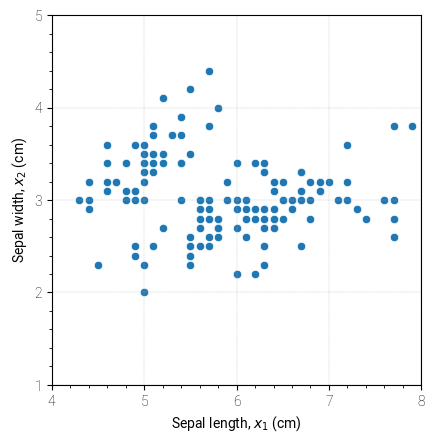

In [4]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="sepal_width")  # 绘制无类别的散点图

ax.set_xlabel('Sepal length, $x_1$ (cm)')  # 设置 x 轴标签
ax.set_ylabel('Sepal width, $x_2$ (cm)')   # 设置 y 轴标签
ax.set_xticks(np.arange(4, 8 + 1, step=1))  # 设置 x 轴刻度
ax.set_yticks(np.arange(1, 5 + 1, step=1))  # 设置 y 轴刻度
ax.axis('scaled')  # 等比例缩放
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])  # 添加网格
ax.set_xbound(lower=4, upper=8)  # 设置 x 轴边界
ax.set_ybound(lower=1, upper=5)  # 设置 y 轴边界

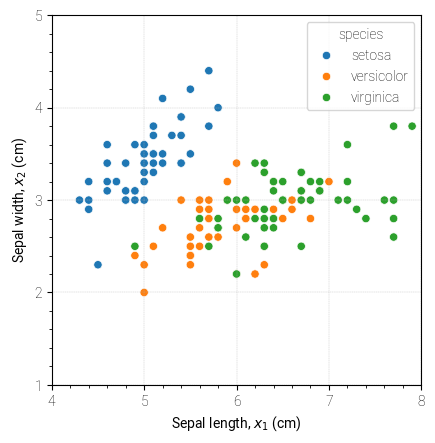

In [5]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, x="sepal_length", 
                     y="sepal_width", hue="species")  # 带有类别信息的散点图

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
ax.set_xbound(lower=4, upper=8)
ax.set_ybound(lower=1, upper=5)

## 3D 散点图

In [6]:
x1 = iris_sns['sepal_length']
x2 = iris_sns['sepal_width']
x3 = iris_sns['petal_length']
labels = iris_sns['species'].copy()
labels[labels == 'setosa'] = 1
labels[labels == 'versicolor'] = 2
labels[labels == 'virginica'] = 3
rainbow = plt.get_cmap("rainbow")

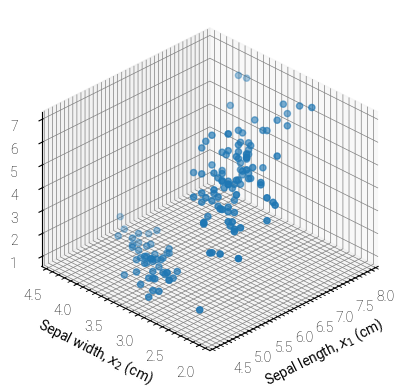

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, x3)  # 无类别信息的 3D 散点图

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_zlabel('Petal length, $x_3$ (cm)')
ax.set_proj_type('ortho')  # 正交投影
ax.view_init(azim=-135, elev=30)

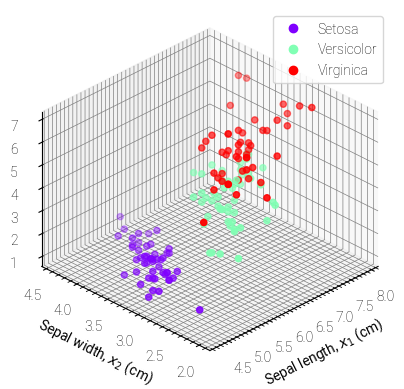

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
scatter_h = ax.scatter(x1, x2, x3, c=labels, cmap=rainbow)  # 带有类别信息的 3D 散点图

classes = ['Setosa', 'Versicolor', 'Virginica']
plt.legend(handles=scatter_h.legend_elements()[0], labels=classes)  # 添加类别图例
ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_zlabel('Petal length, $x_3$ (cm)')
ax.set_proj_type('ortho')
ax.view_init(azim=-135, elev=30)

## 特征两两配对图

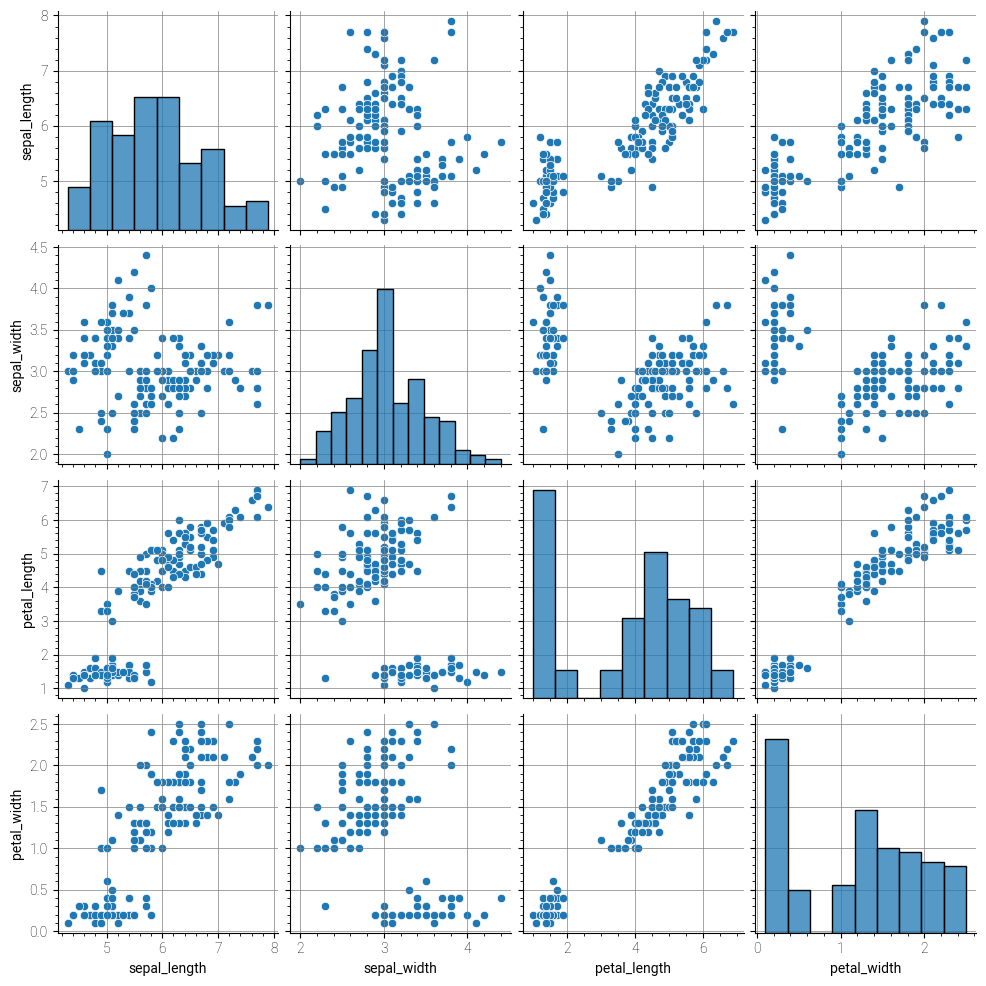

In [9]:
sns.pairplot(iris_sns)  # 不带类别信息的两两配对图

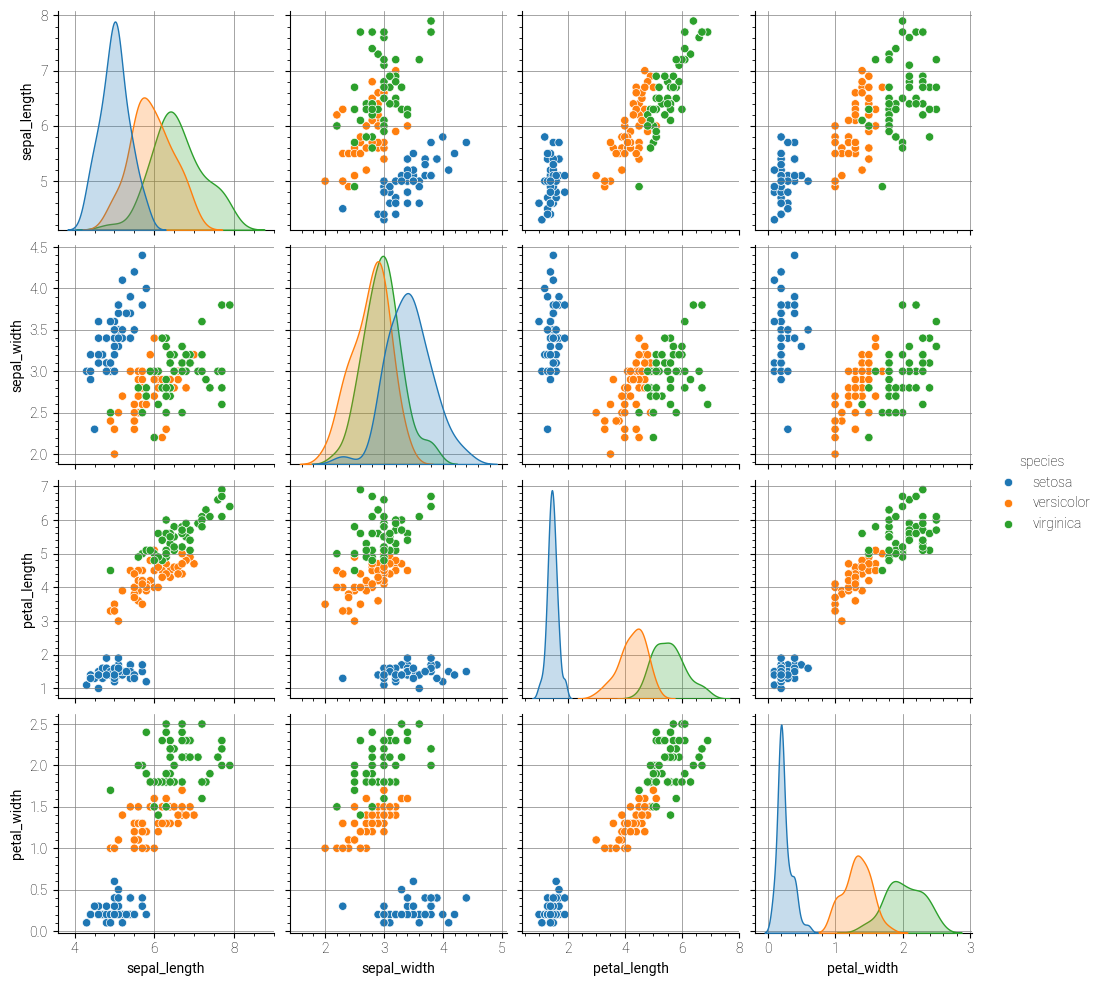

In [10]:
sns.pairplot(iris_sns, hue='species')  # 带类别信息的两两配对图

## 为直方图添加均值线

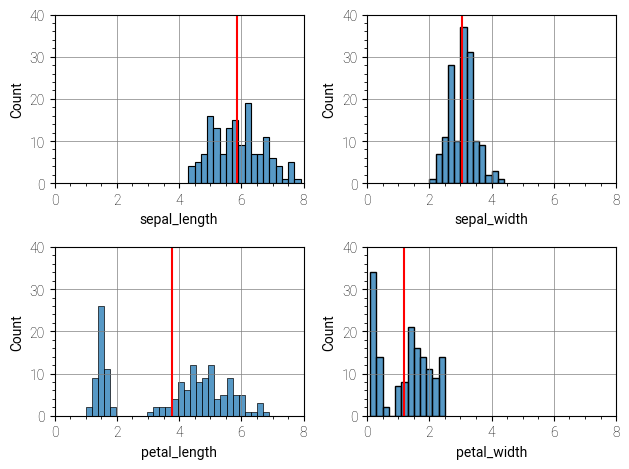

In [11]:
fig, axes = plt.subplots(2, 2)

mu_1 = iris_sns['sepal_length'].mean()
sns.histplot(data=iris_sns, x='sepal_length', binwidth=0.2, ax=axes[0][0])  # Sepal length 直方图
axes[0][0].set_xlim([0, 8]); axes[0][0].set_ylim([0, 40])
axes[0][0].vlines(x=mu_1, ymin=0, ymax=40, color='r')  # 添加均值线

mu_2 = iris_sns['sepal_width'].mean()
sns.histplot(data=iris_sns, x='sepal_width', binwidth=0.2, ax=axes[0][1])  # Sepal width 直方图
axes[0][1].set_xlim([0, 8]); axes[0][1].set_ylim([0, 40])
axes[0][1].vlines(x=mu_2, ymin=0, ymax=40, color='r')

mu_3 = iris_sns['petal_length'].mean()
sns.histplot(data=iris_sns, x='petal_length', binwidth=0.2, ax=axes[1][0])  # Petal length 直方图
axes[1][0].set_xlim([0, 8]); axes[1][0].set_ylim([0, 40])
axes[1][0].vlines(x=mu_3, ymin=0, ymax=40, color='r')

mu_4 = iris_sns['petal_width'].mean()
sns.histplot(data=iris_sns, x='petal_width', binwidth=0.2, ax=axes[1][1])  # Petal width 直方图
axes[1][1].set_xlim([0, 8]); axes[1][1].set_ylim([0, 40])
axes[1][1].vlines(x=mu_4, ymin=0, ymax=40, color='r')

plt.tight_layout()

## 为直方图添加均值和标准差线

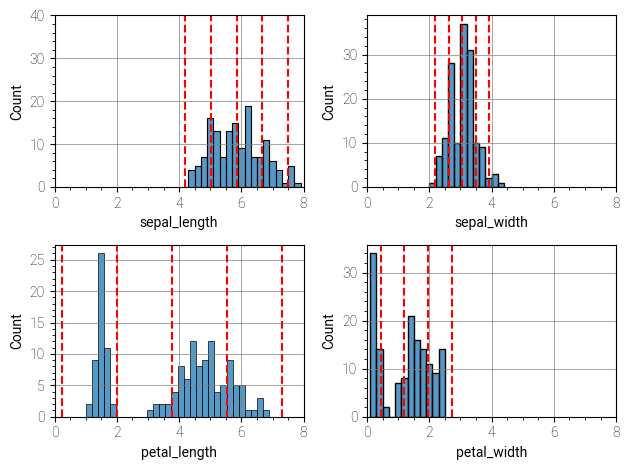

In [12]:
num = 0
fig, axes = plt.subplots(2, 2)
for i in [0, 1]:
    for j in [0, 1]:
        sns.histplot(data=iris_sns, x=iris_sns.columns[num], 
                     binwidth=0.2, ax=axes[i][j])  # 绘制直方图
        axes[i][j].set_xlim([0, 8]); axes[0][0].set_ylim([0, 40])
        
        mu = iris_sns.iloc[:, num].mean()  # 计算均值
        std = iris_sns.iloc[:, num].std()  # 计算标准差
        
        axes[i][j].axvline(x=mu, color='r', linestyle='--')  # 均值线
        axes[i][j].axvline(x=mu - std, color='r', linestyle='--')  # 均值-1标准差
        axes[i][j].axvline(x=mu + std, color='r', linestyle='--')  # 均值+1标准差
        axes[i][j].axvline(x=mu - 2*std, color='r', linestyle='--')  # 均值-2标准差
        axes[i][j].axvline(x=mu + 2*std, color='r', linestyle='--')  # 均值+2标准差
        num = num + 1

plt.tight_layout()

## 协方差矩阵

In [13]:
iris_sns.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, '$\\Sigma$')

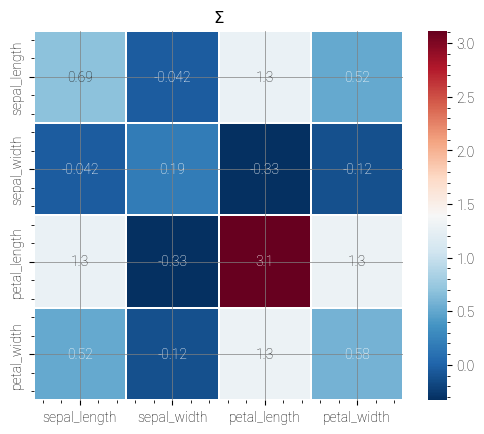

In [14]:
SIGMA = iris_sns.iloc[:,:-1].cov()  # 计算协方差矩阵

fig, axs = plt.subplots()
h = sns.heatmap(SIGMA, cmap='RdBu_r', linewidths=.05, annot=True)  # 绘制热力图
h.set_aspect("equal")
h.set_title(r'$\Sigma$')

## 各类别的协方差矩阵

Text(0.5, 1.0, 'Y = 2, virginica')

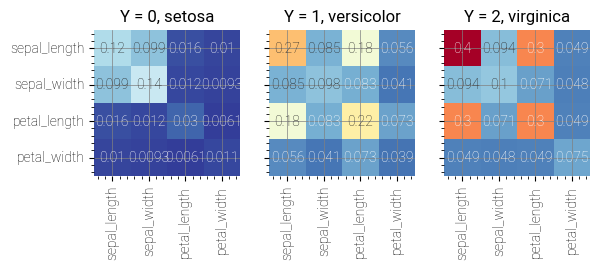

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(iris_sns.loc[iris_sns['species'] == 'setosa'].iloc[:,:-1].cov(),
                 cmap="RdYlBu_r", annot=True, cbar=False, ax=ax1, square=True,
                 vmax=0.4, vmin=0)  # Setosa 的协方差矩阵
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(iris_sns.loc[iris_sns['species'] == 'versicolor'].iloc[:,:-1].cov(),
                 cmap="RdYlBu_r", annot=True, cbar=False, ax=ax2, square=True,
                 vmax=0.4, vmin=0)  # Versicolor 的协方差矩阵
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(iris_sns.loc[iris_sns['species'] == 'virginica'].iloc[:,:-1].cov(),
                 cmap="RdYlBu_r", annot=True, cbar=False, ax=ax3, square=True,
                 vmax=0.4, vmin=0)  # Virginica 的协方差矩阵
ax3.set_title('Y = 2, virginica')

## 线性相关系数矩阵

Text(0.5, 1.0, '$Ρ$')

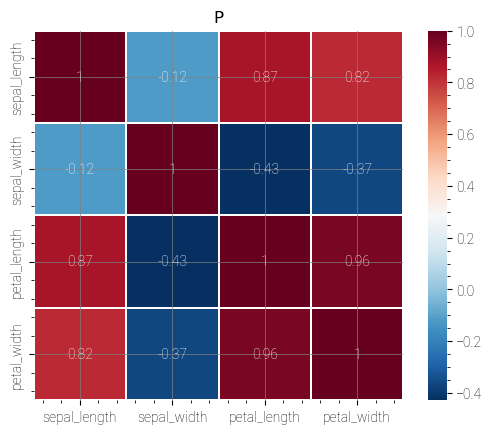

In [16]:
RHO = iris_sns.iloc[:,:-1].corr()  # 计算相关系数矩阵

fig, axs = plt.subplots()
h = sns.heatmap(RHO, cmap='RdBu_r', linewidths=.05, annot=True)  # 绘制热力图
h.set_aspect("equal")
h.set_title('$\u03A1$')

## 各类别的线性相关系数矩阵

Text(0.5, 1.0, 'Y = 2, virginica')

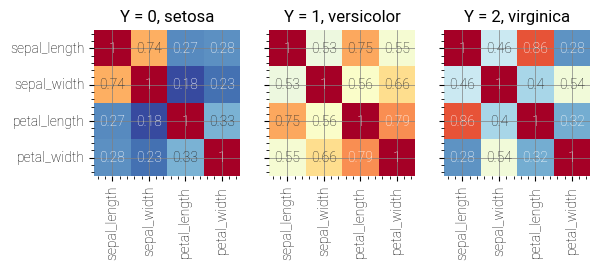

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(iris_sns.loc[iris_sns['species'] == 'setosa'].iloc[:,:-1].corr(),
                 cmap="RdYlBu_r", annot=True, cbar=False, ax=ax1, square=True,
                 vmax=1, vmin=0.15)  # Setosa 的相关系数矩阵
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(iris_sns.loc[iris_sns['species'] == 'versicolor'].iloc[:,:-1].corr(),
                 cmap="RdYlBu_r", annot=True, cbar=False, ax=ax2, square=True,
                 vmax=1, vmin=0.15)  # Versicolor 的相关系数矩阵
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(iris_sns.loc[iris_sns['species'] == 'virginica'].iloc[:,:-1].corr(),
                 cmap="RdYlBu_r", annot=True, cbar=False, ax=ax3, square=True,
                 vmax=1, vmin=0.15)  # Virginica 的相关系数矩阵
ax3.set_title('Y = 2, virginica')